<h1> Questionnaire on Shift from IOS to Android User </h1>

<p> This study aims to see the transitioning of users from iOS devices (such as iPhones, iPads) to Android devices. By understanding these objectives, we aim to gain insights into the factors that contribute to this shift in consumer preferences.
</p>

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
data = pd.read_excel("CB data1.xlsx")
data.head()

,Age,OS_used,Satisfaction Rate,Usage_duration,Appearance_preference,Customization_importance,Switched_OS,Reasons_switch,Decisoin_factor,Best_thing_about_android,Best_in_And,Biggest_challenges,compatibility_in_android,Ease_of_adapting,Recommendation
0,25-35,IOS,3,1-2 years,Neutral,4,No,Normal,"Better user experience, Regular software updates",Features,Openness,Learning a new operating system,iOS offers better compatibility,Somewhat Difficult,No
1,18-25,Android,4,1-2 years,Disagree,5,No,Less challenging,"Ecosystem integration, Security and Privacy Co...",Storage,Flexibility,Learning a new operating system,Both are similar,Very Difficult,Maybe
2,18-25,Android,4,More than 5 years,Neutral,5,No,Normal,NaN,Features,Flexibility,Finding new apps,iOS offers better compatibility,Very Difficult,No
3,above 35,IOS,4,More than 5 years,Disagree,4,No,Normal,"Better user experience, Have not switched",Brand Reputation,Don’t use,Should not be an issue,Android offers better compatibility,Neutral,Maybe
4,18-25,Android,3,3-5 years,Disagree,2,Maybe,Very challenging,"Ecosystem integration, Security and Privacy Co...",Features,Flexibility,Learning a new operating system,iOS offers better compatibility,Neutral,No


In [31]:
data.isnull().sum()

Age                          0
OS_used                      0
Satisfaction Rate            0
Usage_duration               0
Appearance_preference        0
Customization_importance     0
Switched_OS                  1
Reasons_switch               9
Decisoin_factor             11
Best_thing_about_android     3
Best_in_And                  2
Biggest_challenges           7
compatibility_in_android     2
Ease_of_adapting             3
Recommendation               0
dtype: int64

In [32]:
# Drop rows with missing 'Switched_OS' since it's just 1 missing value
data.dropna(subset=['Switched_OS'], inplace=True)

In [33]:
# Filling missing values in categorical columns with "No response" category
categorical_columns = ['Reasons_switch', 'Decisoin_factor', 'Best_thing_about_android', 'Best_in_And', 'Biggest_challenges', 'compatibility_in_android', 'Ease_of_adapting']
data[categorical_columns] = data[categorical_columns].fillna("No response")

In [34]:
# Summary statistics
data.describe()


,Satisfaction Rate,Customization_importance
count,81.000000,81.000000
mean,3.864198,3.592593
std,1.159236,1.292070
min,1.000000,1.000000
25%,3.000000,3.000000
50%,4.000000,4.000000
75%,5.000000,5.000000
max,5.000000,5.000000


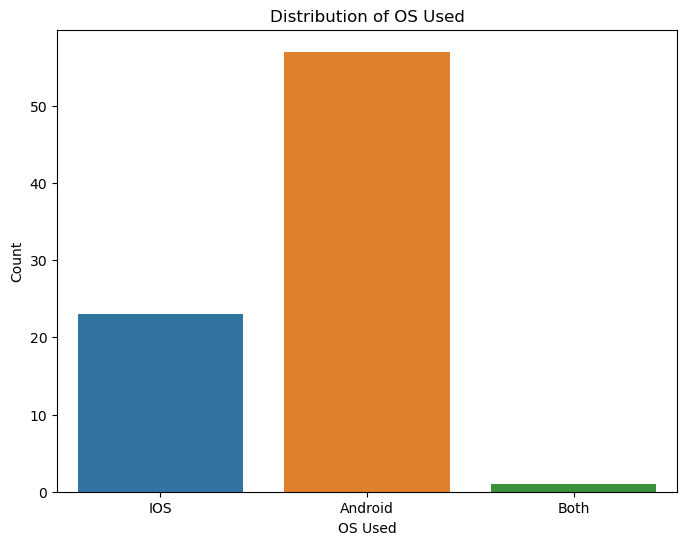

In [35]:
# Distribution of OS_used
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='OS_used')
plt.title('Distribution of OS Used')
plt.xlabel('OS Used')
plt.ylabel('Count')
plt.show()

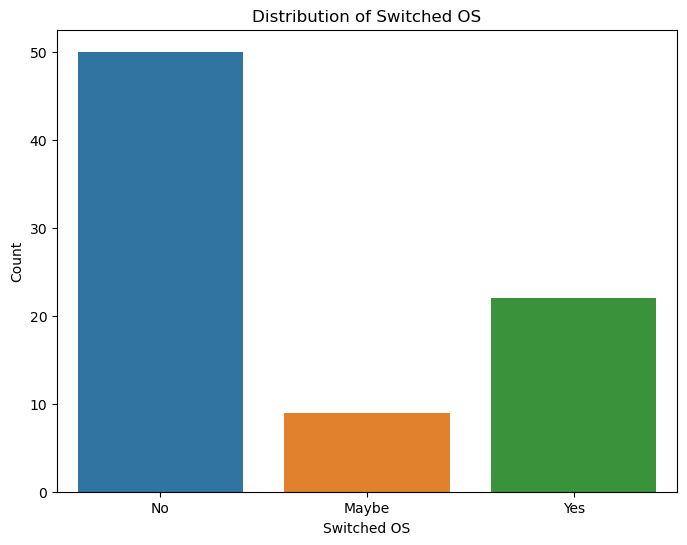

In [36]:
# Distribution of Switched_OS
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Switched_OS')
plt.title('Distribution of Switched OS')
plt.xlabel('Switched OS')
plt.ylabel('Count')
plt.show()

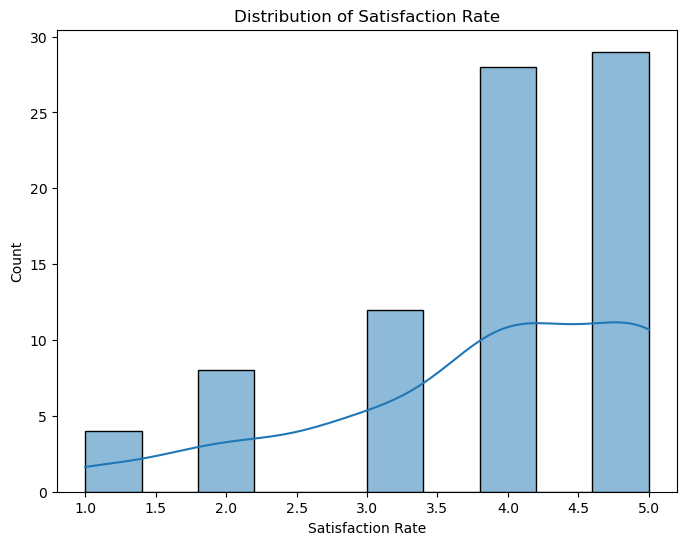

In [37]:
# Satisfaction Rate distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Satisfaction Rate', bins=10, kde=True)
plt.title('Distribution of Satisfaction Rate')
plt.xlabel('Satisfaction Rate')
plt.ylabel('Count')
plt.show()

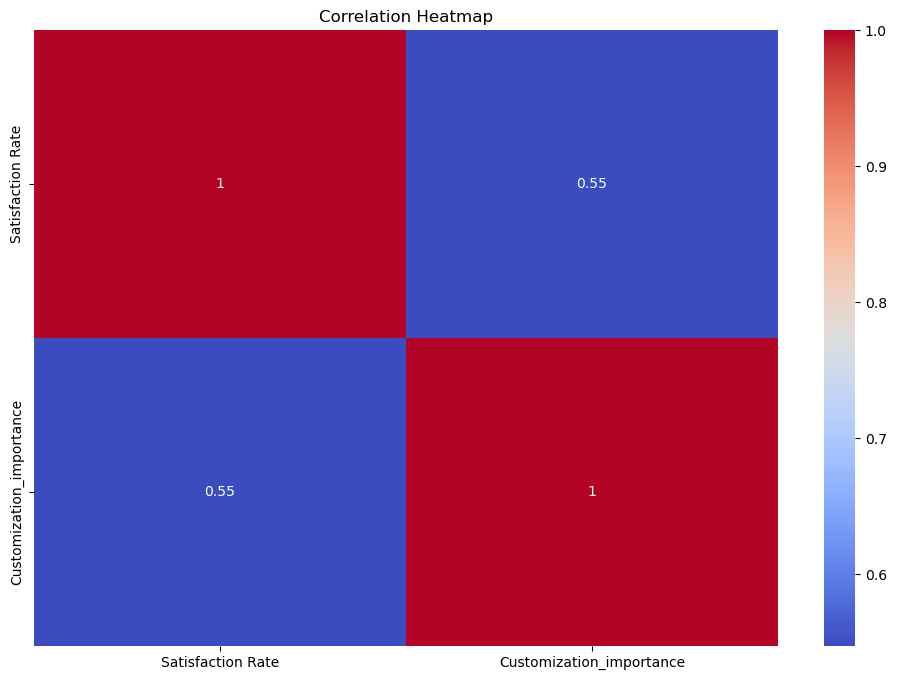

In [38]:
# Correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

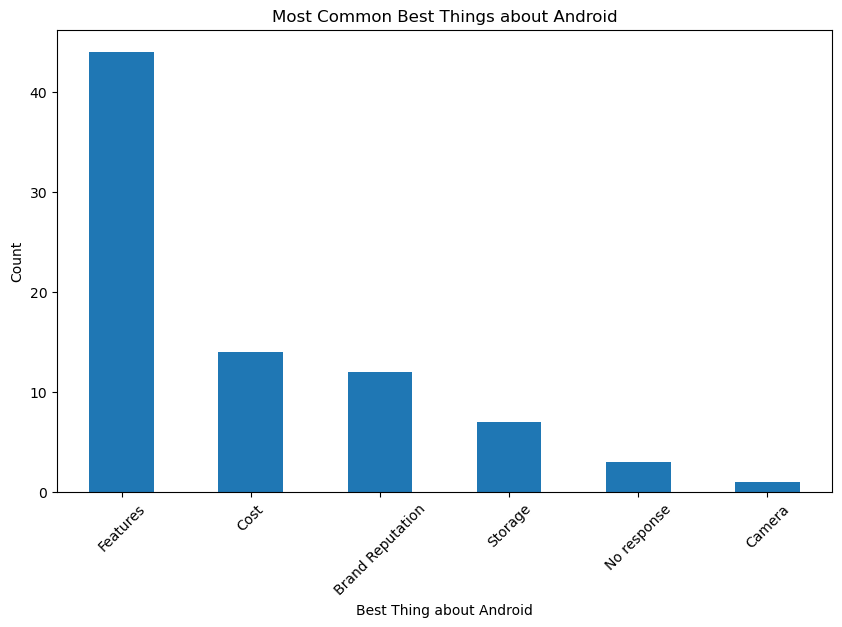

In [39]:
# Most common Best Things about Android
best_things_about_android = data['Best_thing_about_android'].str.split(', ', expand=True).stack().value_counts()
plt.figure(figsize=(10, 6))
best_things_about_android.plot(kind='bar')
plt.title('Most Common Best Things about Android')
plt.xlabel('Best Thing about Android')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

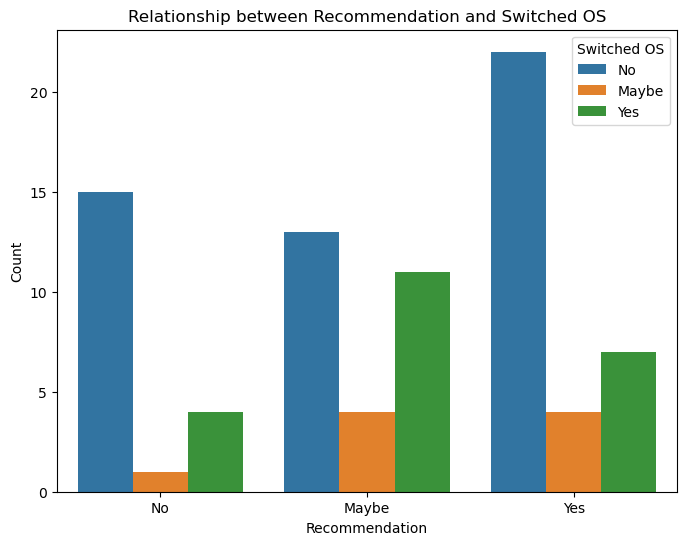

In [40]:
# Relationship between Recommendation and Switched_OS
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Recommendation', hue='Switched_OS')
plt.title('Relationship between Recommendation and Switched OS')
plt.xlabel('Recommendation')
plt.ylabel('Count')
plt.legend(title='Switched OS')
plt.show()

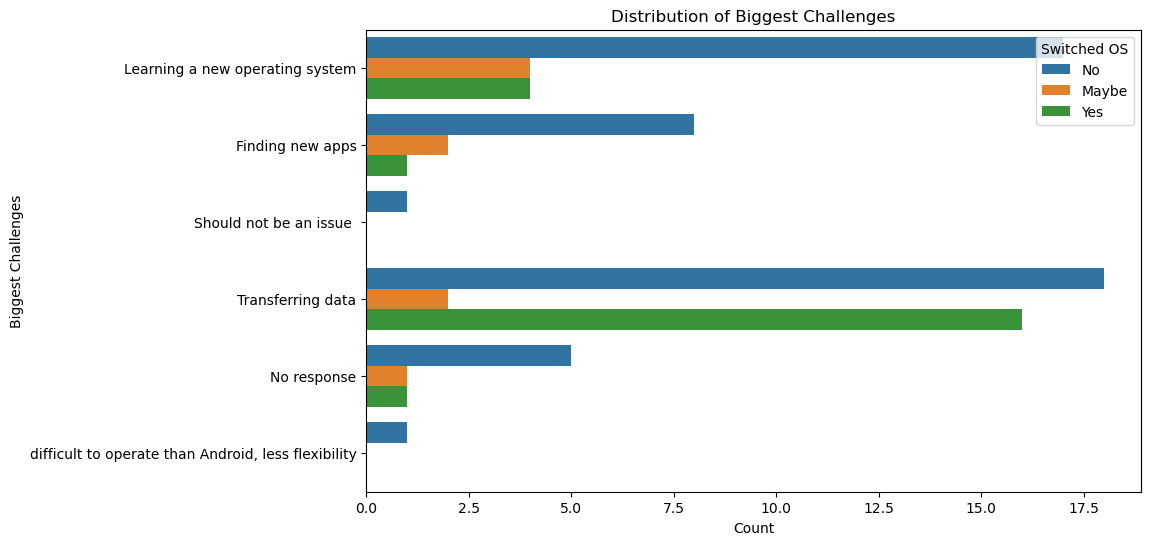

In [41]:
# Biggest Challenges distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='Biggest_challenges', hue='Switched_OS', orient='h')
plt.title('Distribution of Biggest Challenges')
plt.xlabel('Count')
plt.ylabel('Biggest Challenges')
plt.legend(title='Switched OS')
plt.show()